In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [58]:
#extracting lines for simplied verion
open('wat-out.txt','w').writelines([ line for line in open("wat-out.log") if "Enqueue" in line])
print ("done")

done


In [59]:
#extracting content from lines
csv_out = open('wat-out-csv.txt','w')
with open ('wat-out.txt', 'rt') as fft:
    csv_out.write("time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time\n")
    for line in fft:
        line_split = line.split()
        time = line_split[line_split.index("time:") + 1]
        router = line_split[line_split.index("SwitchAllocator") + 3]
        outport = line_split[line_split.index("outport") + 1]
        inport = line_split[line_split.index("inport") + 1]
        packet_address = line_split[line_split.index("addr") + 2][1:-1]
        packet_type = line_split[line_split.index("addr") + 7]
        flit_id = line_split[line_split.index("[flit::") + 1][3:]
        flit_type = line_split[line_split.index("Id="+str(flit_id)) + 1][5:]
        vnet = line_split[line_split.index("Type="+str(flit_type)) + 1][5:]
        vc = line_split[line_split.index("Vnet="+str(vnet)) + 1][3:]
        src_ni = line_split[line_split.index("VC="+str(vc)) + 2][3:]
        src_router = line_split[line_split.index("NI="+str(src_ni)) + 2][7:]
        dst_ni = line_split[line_split.index("Router="+str(src_router)) + 2][3:]
        dst_router = line_split[line_split.index("NI="+str(dst_ni)) + 2][7:]
        enq_time = str(line_split[line_split.index("Enqueue") + 1][5:])
        line_csv = time+","+router+","+outport+","+inport+","+packet_address+","+packet_type+","+flit_id+","+flit_type+","+vnet+","+vc+","+src_ni+","+src_router+","+dst_ni+","+dst_router+","+enq_time+"\n"
        csv_out.write(line_csv)
print ("done")

done


In [60]:
#convert txt to csv

df = pd.read_csv("wat-out-csv.txt",delimiter=',')
df.to_csv('wat-out.csv',index=False)

In [3]:
#dataset
df = pd.read_csv('wat-out.csv')
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
0,7,0,East,Local,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
1,11,1,East,West,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
2,15,2,East,West,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
3,19,3,North,West,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
4,23,7,Local,South,0x1dc0,GETS,0,3,2,8,0,0,23,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329108,3251515,0,Local,North,0x4d2c0,DATA,1,1,4,16,29,13,0,0,3251494
329109,3251516,0,Local,North,0x4d2c0,DATA,2,1,4,16,29,13,0,0,3251494
329110,3251517,0,Local,North,0x4d2c0,DATA,3,1,4,16,29,13,0,0,3251494
329111,3251517,4,South,North,0x4d2c0,DATA,4,2,4,16,29,13,0,0,3251494


In [4]:
df.dtypes

time               int64
router             int64
outport           object
inport            object
packet_address    object
packet_type       object
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [5]:
df.shape

(329113, 15)

In [6]:
df.describe()

,time,router,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,3.291130e+05,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,329113.000000,3.291130e+05
mean,1.796224e+06,5.221541,1.602337,1.397663,2.618389,10.970578,15.495252,5.367521,15.163813,5.081343,1.796203e+06
std,1.083837e+06,4.954917,1.496507,0.978601,0.924325,3.733655,12.516730,5.844344,12.311123,5.635784,1.083836e+06
min,7.000000e+00,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,7.657100e+05,1.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,7.656690e+05
50%,1.857239e+06,4.000000,1.000000,1.000000,2.000000,9.000000,18.000000,2.000000,18.000000,2.000000,1.857228e+06
75%,2.821128e+06,9.000000,3.000000,2.000000,4.000000,16.000000,29.000000,13.000000,27.000000,11.000000,2.821118e+06
max,3.251521e+06,15.000000,4.000000,3.000000,4.000000,19.000000,31.000000,15.000000,31.000000,15.000000,3.251494e+06


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

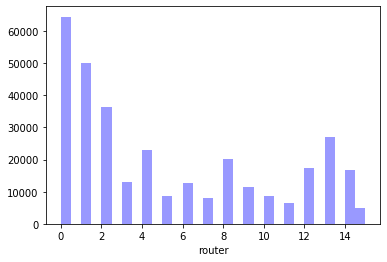

In [8]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

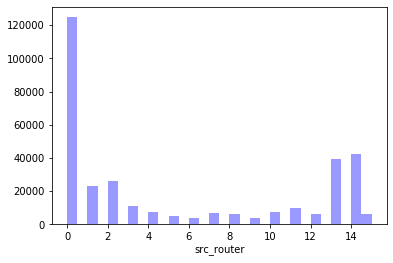

In [9]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

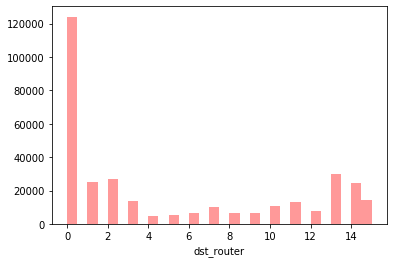

In [10]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

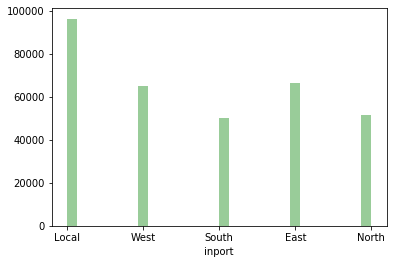

In [11]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

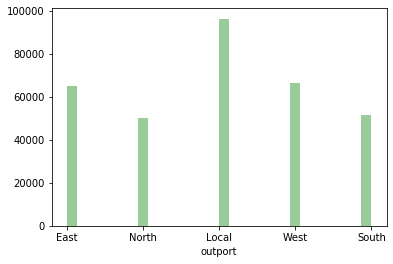

In [12]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

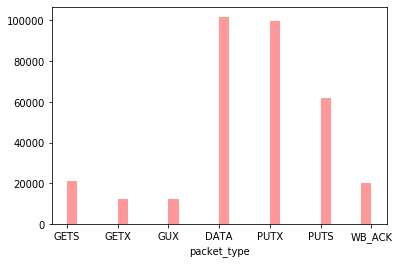

In [13]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')

In [14]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [15]:
data = {'GETS': 0,'GETX': 1,'GUX': 2,'DATA': 3, 'PUTX': 4,'PUTS': 5,'WB_ACK':6}
df = df.replace({'packet_type': data})

In [16]:
df.dtypes

time               int64
router             int64
outport            int64
inport             int64
packet_address    object
packet_type        int64
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [17]:
df['packet_address'].nunique()

1915

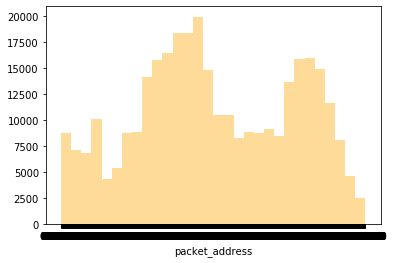

In [33]:
sns.distplot(df['packet_address'], kde = False, bins=30, color='orange')

In [34]:
#dff = pd.DataFrame(df['packet_address'], columns=['packet_address'])

In [35]:
#le = LabelEncoder()
#encode = dff[dff.columns[:]].apply(le.fit_transform)

In [18]:
hoparr = {"0to0":0,"0to1":1,"0to2":2,"0to3":3,"0to4":1,"0to5":2,"0to6":3,"0to7":4,"0to8":2,"0to9":3,"0to10":4,"0to11":5,"0to12":3,"0to13":4,"0to14":5,"0to15":6,
         "1to1":0,"1to2":1,"1to3":2,"1to4":2,"1to5":1,"1to6":2,"1to7":3,"1to8":3,"1to9":2,"1to10":3,"1to11":4,"1to12":5,"1to13":3,"1to14":4,"1to15":5,
         "2to2":0,"2to3":1,"2to4":3,"2to5":2,"2to6":1,"2to7":2,"2to8":4,"2to9":3,"2to10":2,"2to11":3,"2to12":5,"2to13":4,"2to14":3,"2to15":4,
         "3to3":0,"3to4":4,"3to5":3,"3to6":2,"3to7":1,"3to8":5,"3to9":4,"3to10":3,"3to11":2,"3to12":6,"3to13":5,"3to14":4,"3to15":3,
         "4to4":0,"4to5":1,"4to6":2,"4to7":3,"4to8":1,"4to9":2,"4to10":3,"4to11":4,"4to12":2,"4to13":3,"4to14":4,"4to15":5,
         "5to5":0,"5to6":1,"5to7":2,"5to8":2,"5to9":1,"5to10":2,"5to11":3,"5to12":3,"5to13":2,"5to14":3,"5to15":4,
         "6to6":0,"6to7":1,"6to8":3,"6to9":2,"6to10":1,"6to11":2,"6to12":4,"6to13":3,"6to14":2,"6to15":3,
         "7to7":0,"7to8":4,"7to9":3,"7to10":2,"7to11":1,"7to12":5,"7to13":4,"7to14":3,"7to15":2,
         "8to8":0,"8to9":1,"8to10":2,"8to11":3,"8to12":1,"8to13":2,"8to14":3,"8to15":4,
         "9to9":0,"9to10":1,"9to11":2,"9to12":2,"9to13":1,"9to14":2,"9to15":4,
         "10to10":0,"10to11":1,"10to12":3,"10to13":2,"10to14":1,"10to15":2,
         "11to11":0,"11to12":4,"11to13":3,"11to14":2,"11to15":1,
         "12to12":0,"12to13":1,"12to14":2,"12to15":3,
         "13to13":0,"13to14":1,"13to15":2,
         "14to14":0,"14to15":1,
         "15to15":0}

In [24]:
packarr = {}
packtime = {}
hopcurrentarr = []
hoptotarr = []
hoppercentarr =[]
packchunk = []
interval = 500
count = 0
counter = 0
for index, row in df.iterrows():
    current_router = row["router"]
    print("current router "+str(current_router))
    src_router = row["src_router"]
    print("src_router "+str(src_router))
    dst_router = row["dst_router"]
    print("dst_router "+str(dst_router))
    src_router_temp = src_router
    if src_router_temp>dst_router:
        temp = src_router_temp
        src_router_temp = dst_router
        dst_router = temp
    print(" src_router_temp "+str(src_router_temp))
    print("dst_router "+str(dst_router))
    hop_count_string = str(src_router_temp)+"to"+str(dst_router)
    dst_router = row["dst_router"]
    src_router_temp = src_router
    print(src_router_temp)
    print(dst_router)
    print("count "+str(counter))
    counter+=1
    print(hop_count_string)
    hop_count = hoparr.get(hop_count_string)
    src_router_temp = src_router
    if src_router_temp>current_router:
        temp = src_router_temp
        src_router_temp = current_router
        current_router = temp
    current_hop_string = str(src_router_temp)+"to"+str(current_router)
    current_hop = hoparr.get(current_hop_string)
    hop_percent = current_hop/hop_count
    hoptotarr.append(hop_count)
    hopcurrentarr.append(current_hop)
    hoppercentarr.append(hop_percent)
    if row["packet_address"] not in packarr:
        packarr[row["packet_address"]] = count
        packtime[row["packet_address"]] = row["time"]
        packchunk.append(packarr.get(row["packet_address"]))
        count+=1
    else:
        current_time = row["time"]
        position = packarr.get(row["packet_address"])
        pkt_time = packtime.get(row["packet_address"])
        current_max = max(packarr.values())
        if (current_time-pkt_time)<interval:
            packchunk.append(packarr.get(row["packet_address"]))
        else:
            del packarr[row["packet_address"]]
            del packtime[row["packet_address"]]
            packarr[row["packet_address"]] = current_max+1
            packtime[row["packet_address"]] = row["time"]
            packchunk.append(packarr.get(row["packet_address"]))
            if (current_max)==count:
                count+=2
            elif (current_max+1)==count:
                count+=1
print(packarr)
print(packchunk)

current router 0
src_router 0
dst_router 7
 src_router_temp 0
dst_router 7
0
7
count 0
0to7
current router 1
src_router 0
dst_router 7
 src_router_temp 0
dst_router 7
0
7
count 1
0to7
current router 2
src_router 0
dst_router 7
 src_router_temp 0
dst_router 7
0
7
count 2
0to7
current router 3
src_router 0
dst_router 7
 src_router_temp 0
dst_router 7
0
7
count 3
0to7
current router 7
src_router 0
dst_router 7
 src_router_temp 0
dst_router 7
0
7
count 4
0to7
current router 7
src_router 7
dst_router 2
 src_router_temp 2
dst_router 7
7
2
count 5
2to7
current router 6
src_router 7
dst_router 2
 src_router_temp 2
dst_router 7
7
2
count 6
2to7
current router 2
src_router 7
dst_router 2
 src_router_temp 2
dst_router 7
7
2
count 7
2to7
current router 2
src_router 2
dst_router 7
 src_router_temp 2
dst_router 7
2
7
count 8
2to7
current router 2
src_router 2
dst_router 0
 src_router_temp 0
dst_router 2
2
0
count 9
0to2
current router 2
src_router 2
dst_router 0
 src_router_temp 0
dst_router 2
2
0
c

ZeroDivisionError: division by zero

In [18]:
print(len(packarr))

1915


In [19]:
print(len(packchunk))

329113


In [20]:
timearr = []
interval = 99
count = 0
for index, row in df.iterrows():
    if row["time"]<=interval:
        count+=1
    else:
        timearr.append([interval+1,count])
        count=1
        interval+=100
timearr.append([interval+1,count])

In [21]:
countarr = []
maxarr = []
for i in range(len(timearr)):
    for cnt in range(timearr[i][1],0,-1):
        countarr.append(cnt)
        maxarr.append(timearr[i][1])
print(len(countarr))

329113


In [22]:
df = df.assign(pkt_chuck=packchunk)

In [23]:
df = df.assign(pkt_count_all=countarr)
df = df.assign(pkt_max_all=maxarr)
df = df.assign(hop_count=hoptotarr)
df = df.assign(current_hop=hopcurrentarr)
df = df.assign(hop_percentage=hoppercentarr)

In [24]:
#df['packet_address_id'] = encode

In [25]:
df['target'] = 1

In [26]:
df.isnull().sum()

time              0
router            0
outport           0
inport            0
packet_address    0
packet_type       0
flit_id           0
flit_type         0
vnet              0
vc                0
src_ni            0
src_router        0
dst_ni            0
dst_router        0
enq_time          0
pkt_chuck         0
pkt_count_all     0
pkt_max_all       0
target            0
dtype: int64

In [27]:
df.dtypes

time               int64
router             int64
outport            int64
inport             int64
packet_address    object
packet_type        int64
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
pkt_chuck          int64
pkt_count_all      int64
pkt_max_all        int64
target             int64
dtype: object

In [28]:
df.head(10)

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,1
2,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,1
3,19,3,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,1
4,23,7,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,1
5,31,7,4,0,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,21,26,1
6,35,6,3,2,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,20,26,1
7,39,2,0,1,0x1dc0,1,0,3,2,8,23,7,18,2,27,0,19,26,1
8,78,2,2,0,0x1dc0,2,0,3,2,8,18,2,23,7,74,0,18,26,1
9,79,2,4,0,0x1dc0,3,0,0,4,16,18,2,0,0,74,0,17,26,1


In [29]:
df.to_csv('wat-good.csv',index=False)